In [1]:
import sys
sys.path.append("..")
from helpers.tools import *
from model.model_wrapper import Architecture_PL

# Simple result display.


 Load some data samples and a pretrained model to predict

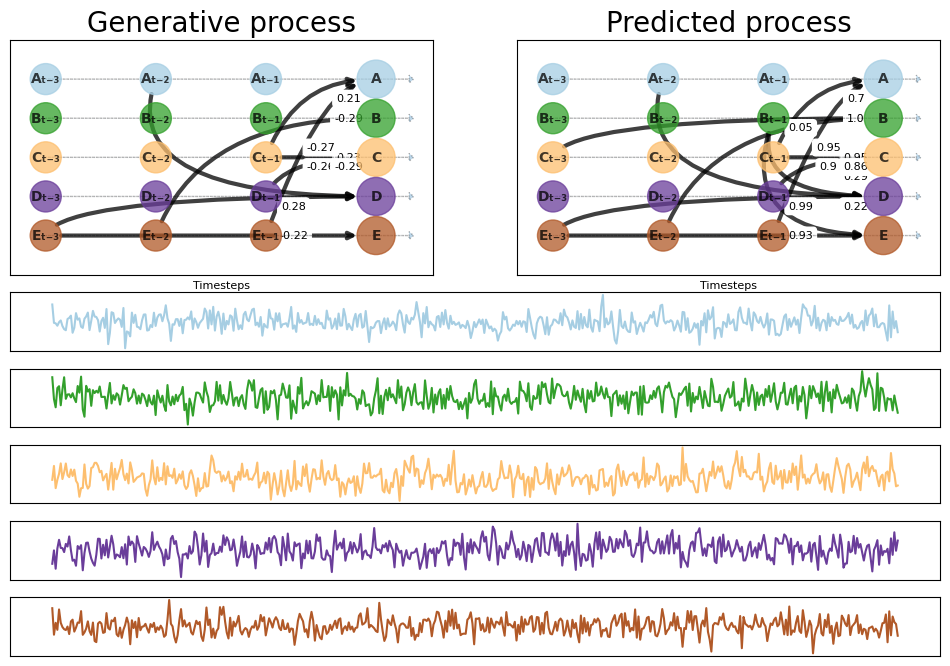

In [5]:
ex = 3

data = pickle.load(open("../data/deterministic_ds/ML/simple_test.p", "rb"))
X =data[ex][0]
Y = data[ex][1]
X = (X - X.min()) / (X.max() - X.min())
corr = lagged_batch_corr(X.unsqueeze(0),3)


model = Architecture_PL.load_from_checkpoint("../pretrained_weights/transformer.ckpt")
M = model.model
M = M.to("cpu")
M = M.eval()   
pred = torch.sigmoid(M((X.unsqueeze(0), corr)))


display_example(X, pred, Y, filter = 0.05,  draw_labels=True)